In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

Populating the interactive namespace from numpy and matplotlib


## Loading and Cleaning Data For Analysis

In [2]:
df = pd.read_csv('./Data/country_wise_latest.csv')

In [3]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [4]:
df.count()

Country/Region            187
Confirmed                 187
Deaths                    187
Recovered                 187
Active                    187
New cases                 187
New deaths                187
New recovered             187
Deaths / 100 Cases        187
Recovered / 100 Cases     187
Deaths / 100 Recovered    187
Confirmed last week       187
1 week change             187
1 week % increase         187
WHO Region                187
dtype: int64

In [5]:
death_abv_1000 = df[df["Deaths"] > 1000]
death_abv_1000.count()

Country/Region            44
Confirmed                 44
Deaths                    44
Recovered                 44
Active                    44
New cases                 44
New deaths                44
New recovered             44
Deaths / 100 Cases        44
Recovered / 100 Cases     44
Deaths / 100 Recovered    44
Confirmed last week       44
1 week change             44
1 week % increase         44
WHO Region                44
dtype: int64

In [7]:
df.rename(columns={"WHO Region": "WHO_Region", "Country/Region":"Country"}, inplace = True)

<BarContainer object of 187 artists>

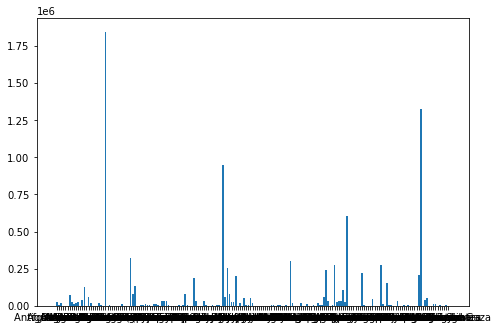

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = df['Country']
y = df['Recovered']
ax.bar(x,y)

In [12]:
df['Recovered'].sort_values(ascending = False)

23     1846641
173    1325804
79      951166
138     602249
35      319954
        ...   
117          0
161          0
147          0
163          0
32           0
Name: Recovered, Length: 187, dtype: int64

In [14]:
WHO = df.groupby(['WHO_Region'])
WHO.mean()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
WHO_Region,,,,,,,,,,,,,
Africa,15066.812500,254.645833,9180.104167,5632.062500,253.666667,7.354167,303.395833,2.306458,57.014792,inf,12669.166667,2397.645833,18.086458
Americas,252551.028571,9792.342857,127674.742857,115083.942857,3700.885714,101.571429,2707.885714,3.052571,62.291429,inf,223291.371429,29259.657143,16.331143
Eastern Mediterranean,67761.090909,1742.681818,54609.090909,11409.318182,564.090909,20.227273,674.681818,3.563182,66.593182,inf,63583.954545,4177.136364,10.482273
Europe,58920.053571,3770.428571,35602.196429,19547.428571,398.107143,5.428571,209.500000,4.198393,68.635000,inf,56193.142857,2726.910714,7.769643
South-East Asia,183529.700000,4134.900000,115693.300000,63701.500000,4899.300000,73.400000,3758.200000,1.296000,66.704000,1.9560,147828.300000,35701.400000,8.513000
Western Pacific,18276.750000,515.562500,12923.125000,4838.062500,205.562500,1.500000,70.437500,1.290000,76.805000,1.7875,16647.437500,1629.312500,22.111250


In [15]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [16]:
df.drop(["Deaths / 100 Cases","Recovered / 100 Cases","Deaths / 100 Recovered"],axis = 1, inplace = True)

In [17]:
df.head()

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Confirmed last week,1 week change,1 week % increase,WHO_Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,749,201,26.84,Africa
